In [1]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.layers import Conv2D
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
import numpy as np
# load ascii text and covert to lowercase
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from datetime import datetime


Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\e

In [2]:
datasetPath ="Dataset/"
modelName = "bestmodel.h5"
checkpoint = "bestModelTextGen.hdf5"
nEpocas = 20
steps_per_epoch = 4
VALIDATION_SIZE = 1
BATCH_SIZE = 32
IMG_SIZE = 300

In [3]:
#imagePath = []
y = []
X = []

print("Carrega dataset")
for root, dirs, files in os.walk(datasetPath):
	for dir in dirs:
		for root2, dirs2, files2 in os.walk(datasetPath+dir):
			for file in files2:
				y.append(dir)
				photo = img_to_array(load_img(datasetPath+dir+"/"+file, target_size=(IMG_SIZE, IMG_SIZE)))
				X.append(photo)
print("Fim - Carrega dataset")

print("Ajeita os dados")
X = numpy.asarray(X)
numberClasses = len(np.unique(y))
count = len(y)
values = array(y)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print("Fim - Ajeita os dados")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

Carrega dataset
Fim - Carrega dataset
Ajeita os dados
Fim - Ajeita os dados


In [10]:

print("Arquitetura")
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(160, activation='relu'))
model.add(Dense(numberClasses, activation='softmax'))
# load the network weights
print("Fim - Arquitetura")

if os.path.isfile(checkpoint):
	model.load_weights(checkpoint)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# define the checkpoint
#filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"

mc = ModelCheckpoint(checkpoint, monitor='loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.000001)

# fit the model
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
history = model.fit( X_train, y_train, epochs=nEpocas, steps_per_epoch=steps_per_epoch, callbacks=[es, mc], validation_steps = val_steps, validation_data=(X_test, y_test))


Arquitetura
Fim - Arquitetura

Train on 75 samples, validate on 75 samples
Epoch 1/20
4/4 [==============================] - 95s 24s/step - loss: 1.3631 - accuracy: 0.4733 - val_loss: 10.3131 - val_accuracy: 0.2000

Epoch 00001: loss improved from inf to 1.36314, saving model to bestModelTextGen.hdf5
Epoch 2/20
4/4 [==============================] - 39s 10s/step - loss: 0.5336 - accuracy: 0.8567 - val_loss: 8.5541 - val_accuracy: 0.2000

Epoch 00002: loss improved from 1.36314 to 0.53359, saving model to bestModelTextGen.hdf5
Epoch 3/20
4/4 [==============================] - 40s 10s/step - loss: 0.2812 - accuracy: 0.9367 - val_loss: 7.0210 - val_accuracy: 0.2000

Epoch 00003: loss improved from 0.53359 to 0.28117, saving model to bestModelTextGen.hdf5
Epoch 4/20
4/4 [==============================] - 40s 10s/step - loss: 0.1435 - accuracy: 0.9667 - val_loss: 5.6911 - val_accuracy: 0.2000

Epoch 00004: loss improved from 0.28117 to 0.14346, saving model to bestModelTextGen.hdf5
Epoch 5/

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\DeepLearning\\lib\\site-packages\\matplotlib\\pyplot.py'>

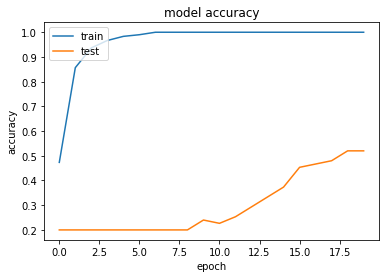

In [19]:
time = datetime.now()
timestampStr = time.strftime("%d %b %Y %H %M %S %f)")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt

In [20]:
plt.clf()


<Figure size 432x288 with 0 Axes>

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\DeepLearning\\lib\\site-packages\\matplotlib\\pyplot.py'>

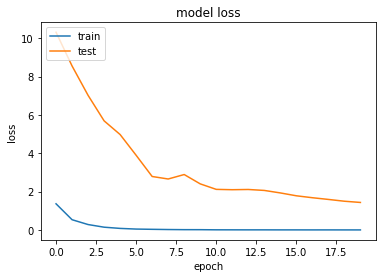

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss"+timestampStr+".png")
plt

In [22]:

plt.clf()



<Figure size 432x288 with 0 Axes>

In [23]:

print("Saved model to disk")
model.save(modelName)


Saved model to disk
